In [11]:
from pandas import read_csv
from pandas import datetime
from pandas import DataFrame
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot
import pandas as pd

<ipython-input-11-b19185013a2e>:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [12]:
# Reading the data
df = pd.read_csv("summer_athlete_medals_count.csv")
print(df.shape)
print(df.info())
df.head()

(2790, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2790 entries, 0 to 2789
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Year      2790 non-null   int64 
 1   Country   2790 non-null   object
 2   Host      2790 non-null   int64 
 3   Athletes  2790 non-null   int64 
 4   Sports    2790 non-null   int64 
 5   Events    2790 non-null   int64 
 6   Gold      2790 non-null   int64 
 7   Silver    2790 non-null   int64 
 8   Bronze    2790 non-null   int64 
 9   Medals    2790 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 218.1+ KB
None


,Year,Country,Host,Athletes,Sports,Events,Gold,Silver,Bronze,Medals
0,1896,Greece,1,102,9,39,10,17,17,44
1,1896,USA,0,14,3,16,11,6,2,19
2,1896,Germany,0,19,6,27,7,5,2,14
3,1896,France,0,12,6,18,5,4,2,11
4,1896,UK,0,10,7,19,3,3,3,9


In [13]:
usa_df =  df[(df.Country == "USA") & (df.Year >= 1896)]
usa_df_gold = usa_df[["Year", "Gold"]]
usa_df_gold.dropna(inplace=True)
df1 = pd.DataFrame([[2020, 0]], columns=list(["Year", "Gold"]))
usa_df_gold = usa_df_gold.append(df1, ignore_index=True)
usa_df_gold.to_csv('usa_gold_data.csv', index=False)

usa_df_silver = usa_df[["Year", "Silver"]]
usa_df_silver.dropna(inplace=True)
df2 = pd.DataFrame([[2020, 0]], columns=list(["Year", "Silver"]))
usa_df_silver = usa_df_silver.append(df2, ignore_index=True)
usa_df_silver.to_csv('usa_silver_data.csv', index=False)

usa_df_bronze = usa_df[["Year", "Bronze"]]
usa_df_bronze.dropna(inplace=True)
df3 = pd.DataFrame([[2020, 0]], columns=list(["Year", "Bronze"]))
usa_df_bronze = usa_df_bronze.append(df3, ignore_index=True)
usa_df_bronze
usa_df_bronze.to_csv('usa_bronze_data.csv', index=False)

usa_df_total = usa_df[["Year", "Medals"]]
usa_df_total.dropna(inplace=True)
df5 = pd.DataFrame([[2020, 0]], columns=list(["Year", "Medals"]))
usa_df_total = usa_df_total.append(df5, ignore_index=True)
usa_df_total
usa_df_total.to_csv('usa_total_data.csv', index=False)

<ipython-input-13-b9896db853ec>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usa_df_gold.dropna(inplace=True)
<ipython-input-13-b9896db853ec>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  usa_df_gold = usa_df_gold.append(df1, ignore_index=True)
<ipython-input-13-b9896db853ec>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usa_df_silver.dropna(inplace=True)
<ipython-input-13-b9896db853ec>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Year=2004, predicted=95, actual=101
Year=2008, predicted=96, actual=110
Year=2012, predicted=105, actual=103
Year=2016, predicted=106, actual=121
Year=2020, predicted=112, actual=0
5
Test MSE: 109.867


<ipython-input-15-5ef151ce4a82>:6: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series = read_csv('usa_total_data.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)


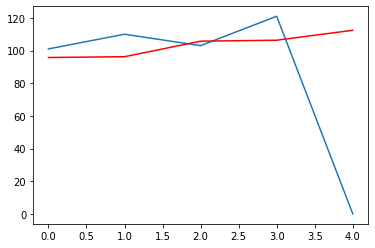

In [15]:
from sklearn.metrics import mean_squared_error
def parser(x):
    #return datetime.strptime('190'+x, '%Y-%m')
    return datetime.strptime(x, '%Y')

series = read_csv('usa_total_data.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
df4 = pd.read_csv("usa_total_data.csv")
error = []
X = series.values
#print(df4['Year'][0])
size = int(len(X) * 0.85)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
#print(test)
for t in range(len(test)):
    model = ARIMA(history, order=(1,1,0))
    #print(model)
    model_fit = model.fit()
    #print(model_fit)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('Year=%i, predicted=%i, actual=%i' % (df4['Year'][size],yhat, obs))
    size +=1
print(len(test))
test_value = test[:-1]
predictions_value = predictions[:-1]
error = mean_squared_error(test_value, predictions_value)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()